Grzegorz Smereczniak, 319102, Informatyka Stosowana, semestr 4

Wczytanie potrzebnych pakietów

In [1]:
import sys
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
def read_and_group_dataset(dataset_name):
# Wczytanie datasetu
    data = pd.read_csv(dataset_name, sep=';')
    data = data.replace(',', '.', regex=True)

# Podzielenie datasetu na grupy uczaca, walidacyjna i testowa
    tre = data[data["atrybut"] == "tre"]
    tre = tre.drop(tre.columns[-1], axis='columns')
    wal = data[data["atrybut"] == 'wal']
    wal = wal.drop(wal.columns[-1], axis='columns')
    test = data[data["atrybut"] == "test"]
    test = test.drop(test.columns[-1], axis='columns')

    return tre, wal, test

In [3]:
def set_model(k, training_dataset):
    model = KNeighborsRegressor(n_neighbors=k)
    training_data = training_dataset.loc[:, 'WE_T-1':].astype(float)
    training_target = training_dataset['WY_E'].astype(float)
    model.fit(training_data, training_target)

    return model

In [4]:
# Znalezienie wartości rmse dla kazdej wartosci k z podanego zakresu
def calculate_rmse_for_k(k_range, training_ds, validation_ds):
    rmse = np.zeros((len(k_range)))

    for k in k_range:
        model = set_model(k=k, training_dataset=training_ds)

        valid_data = validation_ds.loc[:, 'WE_T-1':].astype(float)
        valid_target = validation_ds['WY_E'].astype(float)
        prediction = model.predict(valid_data)

        rmse[k - 1] = np.sqrt(mean_squared_error(valid_target, prediction))
    
    return rmse

In [5]:
# Znalezienie najmniejszego rmse i odpowiadajacego tej wartosci k
def find_min_k(rmse):
    k = np.argmin(rmse)+1

    return k

In [6]:
def calculate_rmse_for_testing_data(k, training_ds, testing_ds):
    
    model = set_model(k=k, training_dataset=training_ds)

    test_data = testing_ds.loc[:, 'WE_T-1':].astype(float)
    test_target = testing_ds['WY_E'].astype(float)
    prediction = model.predict(test_data)

    final_rmse = np.sqrt(mean_squared_error(test_target, prediction))

    return final_rmse

In [7]:
def find_k(k_range, training_data, valid_data):
    rmse = calculate_rmse_for_k(k_range, training_data, valid_data)
    k = find_min_k(rmse)

    return k

In [8]:
dataset = 'dataset.csv'
k_range = range(1, 31)

training_data, valid_data, testing_data = read_and_group_dataset(dataset)

k = find_k(k_range, training_data, valid_data)

final_rmse = calculate_rmse_for_testing_data(k, training_data, testing_data)

print("Final RMSE for testing data for k =", k, "equals", final_rmse)

Final RMSE for testing data for k = 5 equals 903.0600272894059


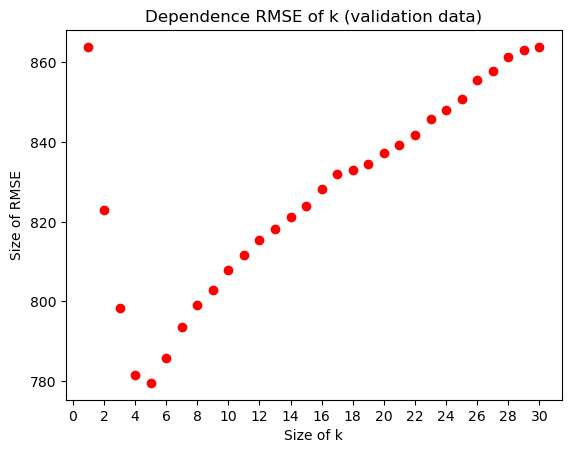

In [9]:
rmse_for_k = calculate_rmse_for_k(k_range=k_range, training_ds=training_data, validation_ds=valid_data)
k = range(1, 31)
plt.plot(k, rmse_for_k, 'ro')
plt.xticks(range(0,31, 2))
plt.ylabel('Size of RMSE')
plt.xlabel('Size of k')
plt.title('Dependence RMSE of k (validation data)')
plt.show()

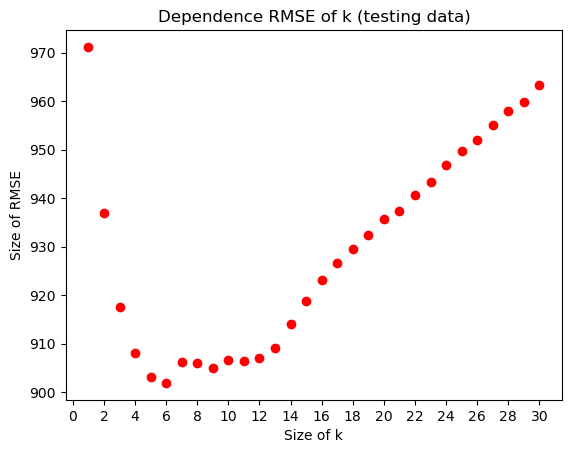

In [10]:
rmse_for_k = calculate_rmse_for_k(k_range=k_range, training_ds=training_data, validation_ds=testing_data)
k = range(1, 31)
plt.plot(k, rmse_for_k, 'ro')
plt.xticks(range(0,31, 2))
plt.ylabel('Size of RMSE')
plt.xlabel('Size of k')
plt.title('Dependence RMSE of k (testing data)')
plt.show()